# Notebook E-tivity 3 CE4021 Task 1

**Student name:** Jason Coleman

**Student ID:** 9539719

## Imports

In [71]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

# Task 1: Option Dice

Rolling two 6-sided fair dice with the aim of determining the probability that the sum of the two dice is less than 3 or more than 10.

* Briefly explain the type of random variable and probability distribution you will use. The choice of a continuous or a discrete random variable, and the probability distribution (normal, uniform, binomial, ..) should be informed by the type of experiment.

* Write Python code to simulate the experiment. The code should run the experiment a sufficient number of times such that you can experimentally approximate the following:

* The expected value of your random variable.

* The standard deviation of your random variable.

* Plot the distribution found in your simulated experiment with an appropriate number of 'bins'

**N.B.:**

* Structure your notebook as follows:
    1. Markdown cell with problem description
    2. Markdown cells with expected value and standard deviation of your random variable
    3. Cell(s) with experiment
    4. Cell(s) with outputs and graphs
    5. Commentary comparing calculated values to experimentally obtained values.

* You may only use the following modules:
    * Random
    * Numpy
    * A visualisation module such as Matplotlib
    * Math

* You are not required to perform exception handling.
* You are not required to provide tests for your code.

# Solution

I will start by outlining the problem. Roll two 6-sided fair dice and determine the probability that the sum of the two dice is less than 3 or more than 10.

| Dice Roll       | Description      | Probability   | Probability |
|-----------------|-----------------|---------------|-------------|
| <span style="font-size:24px;">&#9856;</span> <span style="font-size:24px;">&#9856;</span> | Snake eyes (&#x4DFE;) | 1/36 | 0.0278      |
| <span style="font-size:24px;">&#9860;</span> <span style="font-size:24px;">&#9861;</span> | Yo/Yo-leven      | 1/36 | 0.0278      |
| <span style="font-size:24px;">&#9861;</span> <span style="font-size:24px;">&#9860;</span> | Six five, no Jive | 1/36 | 0.0278      |
| <span style="font-size:24px;">&#9861;</span> <span style="font-size:24px;">&#9861;</span> | Boxcars/Midnight | 1/36 | 0.0278      |


## Structure
The structure of the assignement is as follows:

* I will calculate the various required elements: probabilities, Expected value of the random variable and std-dev of the Random variable. 
* Then I will implement python code to roll dice, describe the experiments, summarise the outcomes with tables and plots. 
* Run the experiments
* Reflect on the observations
* The Appendix will hold things like mathematical derivations and miscellaneus experiments (outside the scope)

## Calculating P(X), E[X] and std-dev for the Random variable

When rolling 2d6, each die has 6 possible outcomes: {1, 2, 3, 4, 5, 6}. The sample space for rolling two such dice is the set of all possible ordered pairs of outcomes, one from the first die and one from the second die.

There are a total of $6 \times 6 = 36$ possible ordered pairs in the total sample space.

$$
S = \{ (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), \\
    (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), \\
    (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), \\
    (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), \\
    (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), \\
    (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6) \}
$$

But we will only we working with a subset due to the filtering (i.e. $X \lt 3$ or $X \gt 10$).

**Goal:** Determining the probability that the sum of the two dice is less than 3 or more than 10
$$
P(X \lt 3 | X \gt 10)
$$

### Probability (when we filter the rolls)
The subset of ordered pairs, known as the possible outcomes, that sum to $> 10$ or $< 3$ are:

$$
S' = \{ (1, 1), (5, 6), (6, 5), (6, 6) \}
$$


To find the probability of rolling an ordered pair that belongs to the subset $S'$, we divide the number of desired outcomes by the total number of possible outcomes when rolling two six-sided dice. 

The probability of rolling one of the desired outcomes, $P(S')$ is:

$$
P(S') = \frac{\text{No. of desired outcomes}}{\text{Total Number of Outcomes}}
$$

$$
P(S') = \frac{4}{36} = \frac{1}{9} \approx \boxed{0.11}
$$

 Another way to look at this is:

* Rolling less than 3, rolling a (1,1):


$$
\frac{1}{6} \times \frac{1}{6} = \frac{1}{36} = \boxed{0.0278}
$$


* Rolling greater than 10: rolling (5,6), (6,5), (6,6)


$$
(\frac{1}{6} \times \frac{1}{6}) = \frac{1}{36}
$$

$$
(\frac{1}{6} \times \frac{1}{6}) + (\frac{1}{6} \times \frac{1}{6}) = \frac{1}{18}
$$

$$
=> \frac{1}{36} + \frac{1}{18} = \frac{1}{12} = \boxed{0.0834}
$$

* Probability of rolling a desired outcome is:

$$
0.0278 + 0.0834 \approx  \boxed{0.1112}
$$

### Mathematical Summary
The following table shows the calculations: 

* At face value, the distribution of 2d6, filtering out X<2 or X>10 is non-uniform. The distribution for an unfiltered 2d6 is not normal but tends towards triangular.
* Random Variables, $X$ are numerical values that are assigned to an outcome of an event. We can calculate the probability of the random variable having a particular value ($P(x)$).
* Our random variables are discrete (countable and finite).
* The possible outcomes are, $\boxed{S' = \{ 2, 11, 11, 12 \}}$ out of a total of 36 possible dice throws.
* The probability of rolling one of the desired outcomes is $\boxed{0.1112}$
* The Expected Value is: TODO
* The standard deviation, $\sigma$: TODO$
* Depending on how we phrase this, this "game" could be termed a `Bernoulli Trial` since we are measuring success (sum < 3 or > 10) or failure so, then the  distribution is `Binomial`. See the Appendix for more details, the game section.

## Python Implementation
The approach I'll take will rely on rolling lots of 2d6 and measuring when the sums of the dice match our conditions. I will want to see if the number of trials I do, impacts how well I match the previous paper-based calculations (see [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers)). 

When I write this code, I'm not really thinking about the type of distributions; I just want to run the experiments to see the shapes I get. I can then match it to the theory above.

In [95]:
def roll_2d6() -> int:
    """
    Simple function to roll 2d6 and return the sum of the two dice.

    :return: A sum of random variables representing the event, rolling 
             a dice (Sum of a single 2d6 dice roll).
    """

    return random.randint(1,6) + random.randint(1,6)

## What if we reframe the task as a game
It seems like the approach we take depends on how we phrase the problem. You could say that this task relates to a very simple dice game where:

* The player has two six-sided dice
* You `win` the round if you roll one of the combinations below.
* Else, you `lose`.

| Dice Roll       | Description      | 
|-----------------|-----------------|
| <span style="font-size:24px;">&#9856;</span> <span style="font-size:24px;">&#9856;</span> | Snake eyes (&#x4DFE;) | 
| <span style="font-size:24px;">&#9860;</span> <span style="font-size:24px;">&#9861;</span> | Yo/Yo-leven      |
| <span style="font-size:24px;">&#9861;</span> <span style="font-size:24px;">&#9860;</span> | Six five, no Jive | 
| <span style="font-size:24px;">&#9861;</span> <span style="font-size:24px;">&#9861;</span> | Boxcars/Midnight | 

So, what is the probability of winning the game? 

There are two outcomes: success or failure. In this case, the distribution for the sum of two die rolls is `non-uniform`. We could consider this a `Bernoulli Trial` since we are measuring success (where sum < 3 or > 10) or failure. 

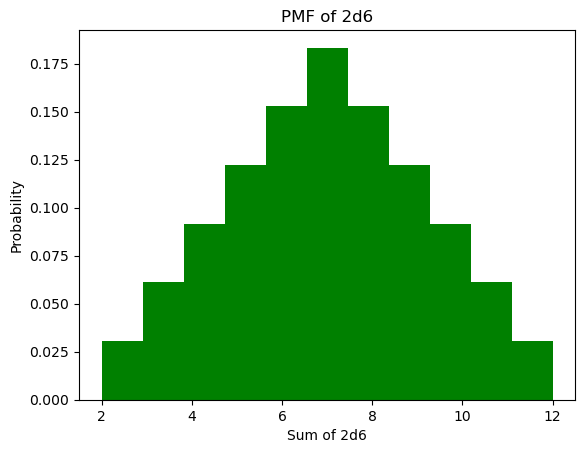

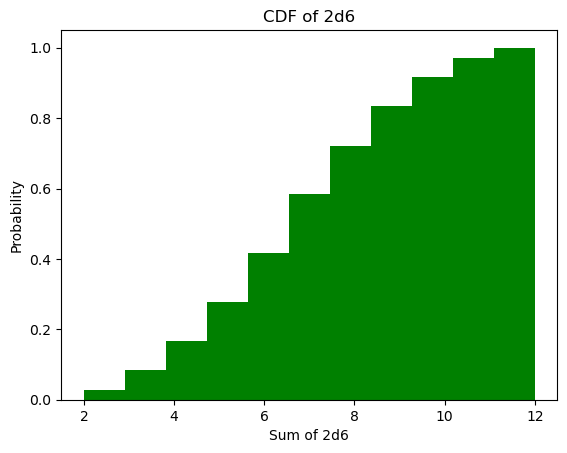

In [119]:
num_trials = 100_000_000 # Law of large numbers, takes 1.2m to run on an M1 Ultra

sums = [roll_2d6() for i in range(num_trials)]

#filter sums by sum > 10 or sum < 3
# sums = [x for x in sums if x > 10 or x < 3]


# . plot as a PMF show mean
plt.hist(sums, bins=11, density=True, label="PMF", color='green')
plt.title("PMF of 2d6")
plt.xlabel("Sum of 2d6")
plt.ylabel("Probability")
plt.show()

# plot as a CDF
plt.hist(sums, bins=11, density=True, cumulative=True, label="CDF", color='green')
plt.title("CDF of 2d6")
plt.xlabel("Sum of 2d6")
plt.ylabel("Probability")
plt.show()


## Reflection

#### Summary:

* The sum of two dice is represented by a discrete random variable which in turn represents the sum of two random variables (each dice roll numerical result is its own random variable).
* The probability distribution is unique to the process of summing two dice, with a  filtering condition and doesn't quite fit the standard definitions of uniform,  or normal distributions (for two dice - we can approach a normal dist if we vastly increase the number of iterations - see [here](https://mathworld.wolfram.com/Dice.html)).
* The bigger the sample size, the more the actual probabilities tends to approach the expected probabilities.
* I actually did this backwards - I used Python to get experimental evidence and then worked on the maths.

## References:
* https://www.youtube.com/watch?v=YXLVjCKVP7U&ab_channel=zedstatistics - PMF, CDF
* https://youtu.be/YXLVjCKVP7U?t=397 Probaility vs. Outcome
* [mbmlbook](https://mbmlbook.com/MurderMystery.html#concept_def_random_variable)
* [Brilliant Random Variable course](https://brilliant.org/courses/probability_ii/introduction-110/random-variables)
* [Dice, Mathworld](https://mathworld.wolfram.com/Dice.html)
* [Playing Craps](https://mathworld.wolfram.com/Craps.html)
* [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers)
* [Random Variables](https://online.stat.psu.edu/stat500/lesson/3/3.1)
* [Expected Value and Variance of Discrete Random Variables](https://online.stat.psu.edu/stat500/lesson/3/3.2/3.2.1)

## Appendix

### Definitions

**Random Variable, X**
*"A random variable, $X$ assigns a numerical value to each outcome of a chance event. Random variables are not the same as the event they quantify"* (see [Brilliant](https://brilliant.org/courses/probability_ii/introduction-110/random-variables)). In our case, each dice roll result is a Random Variable and the sum of the dice rolls is also a Random variable (a compound one).


**Sample Space, S**
This is the set of all possible outcomes for an event.

**Type of Random Variable:**
The sum of the two dice represents a single  `discrete random` variable as the dice roll can only lead to positive integers in the range 2-12. 

**Probability Distribution:**
The probability distribution shows the likelihood for each possible value. In some ways, the question determines the distribution.

*Notes:* I will use $nd6$ to represent the sum of n d6-sided dice (e.g. 1d6, 2d6).

* **Rolling 1d6** - The distribution for a perfectly balanced, single dice roll is `uniform`. Each result is equally likely (i.e. $\frac{1}{6}$ chance). For this assignment, we are not interested in just 1d6.
* **Rolling 2d6** - while the distribution of a fair 1d6 is uniform, the distribution for the sum of two die rolls is `non-uniform` (since there are different chances assigned to getting each sum).